In [ ]:
# This command will download specific versions of
# numpy, matplotlib, scanpy, scipy, dadapy and biopython
# WITHOUT creating a virtual env

!pip install -r requirements.txt
# conda install --yes --file requirements.txt

In [2]:
import sys 

sys.path.insert(1, 'My_libs/')

import IDmeter
import importlib
importlib.reload(IDmeter)

import Plot_figures
import importlib
importlib.reload(Plot_figures)

import Download_data
import importlib
importlib.reload(Download_data)

import collections
import numpy as np

# Panel 2

In the following code we reproduce Figs. 2A, B, C of the main text of our article titled "The intrinsic dimension of gene expression during cell differentiation".

# Mouse pancreatic endocrinogenesis

The original dataset is available on GEO repository (GSE132188).

From the metadata they supply, we took the column named "day" and renamed it *stage* in *adata.obs*.

To directly download the formatted version of this data, [click here](https://drive.google.com/drive/folders/1bm69GFaq8lcXRjAtxbgQIi2j_H_cX6bi?usp=drive_link).

### Download data

In [3]:
dataset_name = "MousePancreas"
data_file_path = 'Data/'
data_file_name = 'MousePancreas_formatted.h5ad'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_path, 
                                                  data_file_name, 
                                                  verbose = True)

Welcome to PANCREAS EMBRYOGENESIS dataset!


/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


scRNA-seq data in a counts matrix cells x genes with shape ((36351, 27998))
Gene names stored in adata.var
Metadata about cells stored in adata.obs (Index(['stage', 'celltype', 'mt_frac', 'cell'], dtype='object'))

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 1200 expressed genes were deleted (0)
 - cells with mitochondrial gene-expression fractions greater than 20.0% (0)

Genes selection...
Selecting 18734 protein-coding genes
Deleting genes full of zeros

Normalization of the counts matrix...

After the filtering procedure, scRNA-seq data have shape ((36351, 16558))


### ID measure

In [4]:
times_dict = dict(collections.Counter(df.stage.values))
labels = stages = np.array(list(times_dict.keys()))

times_dict = dict(sorted(times_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(times_dict.values())[0]*0.75)

print("Number of cells per developmental stage:", times_dict)
print("From each stage we will sub-sample", n_subsampled_cells, "cells")

Number of cells per developmental stage: {'13.5': 5042, '14.5': 9633, '12.5': 10790, '15.5': 10886}
From each stage we will sub-sample 3781 cells


In [5]:
dataset_name = "MousePancreas"
labeling = "Time"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset MousePancreas
Time-based grouping of cells
Labels: ['12.5' '13.5' '14.5' '15.5']
3 independent sub-samplings
Counts matrix dimension=(36351, 16558)


Subsampling number 1 , with seed: 982303. 12.5 ID = 52.4 - 13.5 ID = 45.1 - 14.5 ID = 37.6 - 15.5 ID = 29.1 - 


Subsampling number 2 , with seed: 447987. 12.5 ID = 48.5 - 13.5 ID = 43.9 - 14.5 ID = 38.1 - 15.5 ID = 28.1 - 


Subsampling number 3 , with seed: 221148. 12.5 ID = 50.5 - 13.5 ID = 44.5 - 14.5 ID = 39.2 - 15.5 ID = 29.4 - 



### Plot

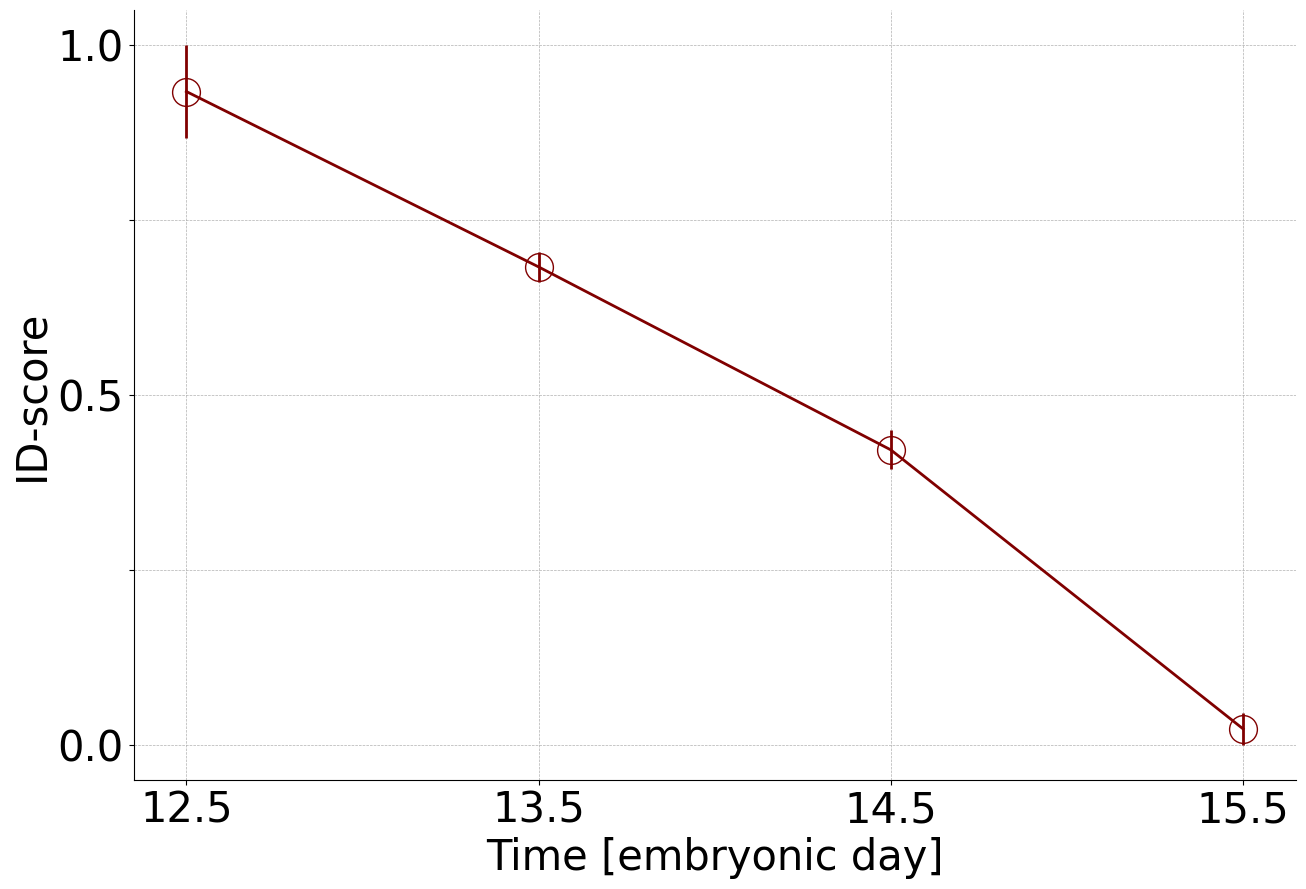

In [6]:
xlabel = f'{labeling} [embryonic day]'
Plot_figures.plot_temporal_trend(results_dict, dataset_name, xlabel)

# Mouse corticogenesis

The original dataset is available on GEO repository (GSE153162).

From the metadata they supply, we took the column named "orig_ident" and renamed it *stage* in *adata.obs*. The values of this attribute are: 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18_S1', 'E18_S3', 'P1_S1', 'P1', 'P4' (where '_S*' specifies different replica of the experiment). 
For transparency, we show the ID-score for every stage reported in the original dataset in the following, but in the main text of our article we only focus on the time window E10-E17.

To directly download the formatted version of this data, [click here](https://drive.google.com/drive/folders/1bm69GFaq8lcXRjAtxbgQIi2j_H_cX6bi?usp=drive_link).

### Download data

In [7]:
dataset_name = "MouseCorticogenesis"
data_file_path = 'Data/'
data_file_name = 'MouseCorticogenesis_formatted.h5ad'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_path, 
                                                  data_file_name, 
                                                  verbose = True)

Welcome to MOUSE CORTICOGENESIS dataset!


/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Deleting doublet cells (0) and low quality cells (0)
scRNA-seq data in a counts matrix cells x genes with shape ((80467, 27998))
Gene names stored in adata.var
Metadata about cells stored in adata.obs (Index(['stage', 'celltype', 'scrublet_doublet', 'percent_mito', 'cell'], dtype='object'))

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 500 expressed genes were deleted (0) deleted
 - cells with mitochondrial gene-expression fractions greater than 7.5% were deleted (0)

Genes selection...
Selecting 18734 protein-coding genes
Deleting genes full of zeros

Normalization of the counts matrix...

After the filtering procedure, scRNA-seq data have shape ((77842, 16461))


### ID measure

In [8]:
times_dict = dict(collections.Counter(df.stage.values))
labels = stages = np.array(list(times_dict.keys()))

times_dict = dict(sorted(times_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(times_dict.values())[0]*0.75)

print("Number of cells per developmental stage:", times_dict)
print("From each stage we will sub-sample", n_subsampled_cells, "cells")

Number of cells per developmental stage: {'E10': 1041, 'E11': 2647, 'E14': 3268, 'P1': 4487, 'E16': 5042, 'E18_S1': 5925, 'E13': 6050, 'P1_S1': 6165, 'P4': 6251, 'E12': 7357, 'E17': 8495, 'E15': 10289, 'E18_S3': 10825}
From each stage we will sub-sample 780 cells


In [9]:
dataset_name = "MouseCorticogenesis"
labeling = "Time"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset MouseCorticogenesis
Time-based grouping of cells
Labels: ['E10' 'E11' 'E12' 'E13' 'E14' 'E15' 'E16' 'E17' 'E18_S1' 'E18_S3' 'P1_S1'
 'P1' 'P4']
3 independent sub-samplings
Counts matrix dimension=(77842, 16461)


Subsampling number 1 , with seed: 179861. E10 ID = 103.6 - E11 ID = 46.5 - E12 ID = 36.7 - E13 ID = 46.3 - E14 ID = 38.9 - E15 ID = 36.7 - E16 ID = 32.4 - E17 ID = 40.4 - E18_S1 ID = 38.0 - E18_S3 ID = 34.7 - P1_S1 ID = 35.9 - P1 ID = 34.3 - P4 ID = 36.6 - 


Subsampling number 2 , with seed: 458990. E10 ID = 104.8 - E11 ID = 49.6 - E12 ID = 37.3 - E13 ID = 49.8 - E14 ID = 34.8 - E15 ID = 32.6 - E16 ID = 39.3 - E17 ID = 41.5 - E18_S1 ID = 40.8 - E18_S3 ID = 35.3 - P1_S1 ID = 34.4 - P1 ID = 30.8 - P4 ID = 35.8 - 


Subsampling number 3 , with seed: 724656. E10 ID = 104.2 - E11 ID = 40.9 - E12 ID = 41.9 - E13 ID = 51.8 - E14 ID = 36.6 - E15 ID = 31.4 - E16 ID = 39.1 - E17 ID = 44.5 - E18_S1 ID = 36.3 - E18_S3 ID = 35.2 - P1_S1 ID = 36.8 - P1 ID = 31.5 - P4 ID =

### Plot

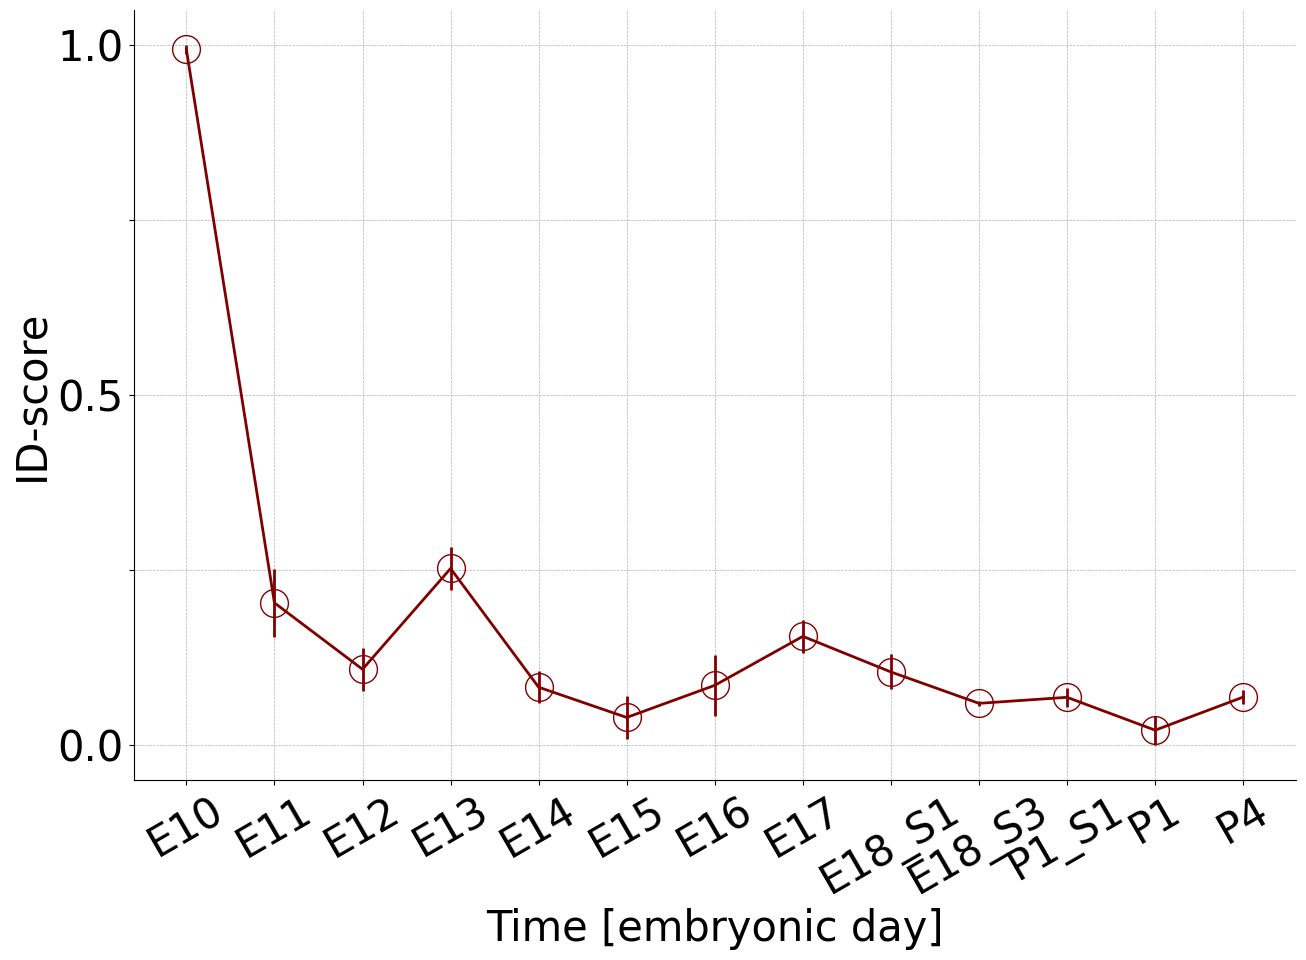

In [10]:
xlabel = f'{labeling} [embryonic day]'

plot_params = {"figsize": (15, 10),
                "label_size": 30,
                "markersize": 20,
                "linewidth": 2,
                "xlabel_rotation": 30}

Plot_figures.plot_temporal_trend(results_dict, dataset_name, xlabel, plot_params = plot_params)

# Zebrafish neurogenesis Raj

The original dataset is available on GEO repository (GSE158142).

From the metadata they supply, we took the column named "stage" and we stored it in *adata.obs*.

To directly download the formatted version of this data, [click here](https://drive.google.com/drive/folders/1bm69GFaq8lcXRjAtxbgQIi2j_H_cX6bi?usp=drive_link).

### Data download

In [11]:
dataset_name = "ZebraNeurogenesis"
data_file_path = 'Data/'
data_file_name = 'MouseNeurogenesis_Raj_formatted.h5ad'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_path, 
                                                  data_file_name, 
                                                  verbose = True)

Welcome to ZEBRAFISH RAJ dataset!


/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/niccolo/Desktop/Waddington ID/Codici/The-intrinsic-dimension-of-gene-expression-during-cell-differentiation/.venv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


scRNA-seq data in a counts matrix cells x genes with shape ((137706, 32191))
Gene names stored in adata.var
Metadata about cells stored in adata.obs (Index(['stage', 'cell'], dtype='object'))

Quality control on cells...

Genes selection...
Selecting 23563 protein-coding genes
Deleting genes full of zeros

Normalization of the counts matrix...

After the filtering procedure, scRNA-seq data have shape ((137706, 22905))


### ID measure

In [12]:
times_dict = dict(collections.Counter(df.stage.values))
labels = stages = np.array(list(times_dict.keys()))

times_dict = dict(sorted(times_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(times_dict.values())[0]*0.75)

print("Number of cells per developmental stage:", times_dict)
print("From each stage we will sub-sample", n_subsampled_cells, "cells")

Number of cells per developmental stage: {'5dpf': 7980, '24hpf': 9376, '14hpf': 10116, '16hpf': 10792, '18hpf': 10904, '20hpf': 13266, '8dpf': 15764, '2dpf': 16042, '3dpf': 18065, '15dpf': 25401}
From each stage we will sub-sample 5985 cells


In [13]:
dataset_name = "ZebraNeurogenesis"
labeling = "Time"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset ZebraNeurogenesis
Time-based grouping of cells
Labels: ['14hpf' '16hpf' '18hpf' '20hpf' '24hpf' '2dpf' '3dpf' '5dpf' '8dpf'
 '15dpf']
3 independent sub-samplings
Counts matrix dimension=(137706, 22905)


Subsampling number 1 , with seed: 115741. 
Sub-sampling so that every stage is equally represented by 5000 cells
14hpf ID = 61.1 - 16hpf ID = 51.1 - 18hpf ID = 51.2 - 20hpf ID = 27.9 - 24hpf ID = 35.4 - 2dpf ID = 31.2 - 3dpf ID = 27.0 - 5dpf ID = 22.2 - 8dpf ID = 32.1 - 15dpf ID = 27.8 - 


Subsampling number 2 , with seed: 673723. 
Sub-sampling so that every stage is equally represented by 5000 cells
14hpf ID = 58.0 - 16hpf ID = 53.2 - 18hpf ID = 51.0 - 20hpf ID = 27.7 - 24hpf ID = 35.9 - 2dpf ID = 29.0 - 3dpf ID = 24.3 - 5dpf ID = 22.5 - 8dpf ID = 32.9 - 15dpf ID = 28.3 - 


Subsampling number 3 , with seed: 344882. 
Sub-sampling so that every stage is equally represented by 5000 cells
14hpf ID = 62.8 - 16hpf ID = 52.5 - 18hpf ID = 52.3 - 20hpf ID = 28.2 - 24hpf ID 

### Plot

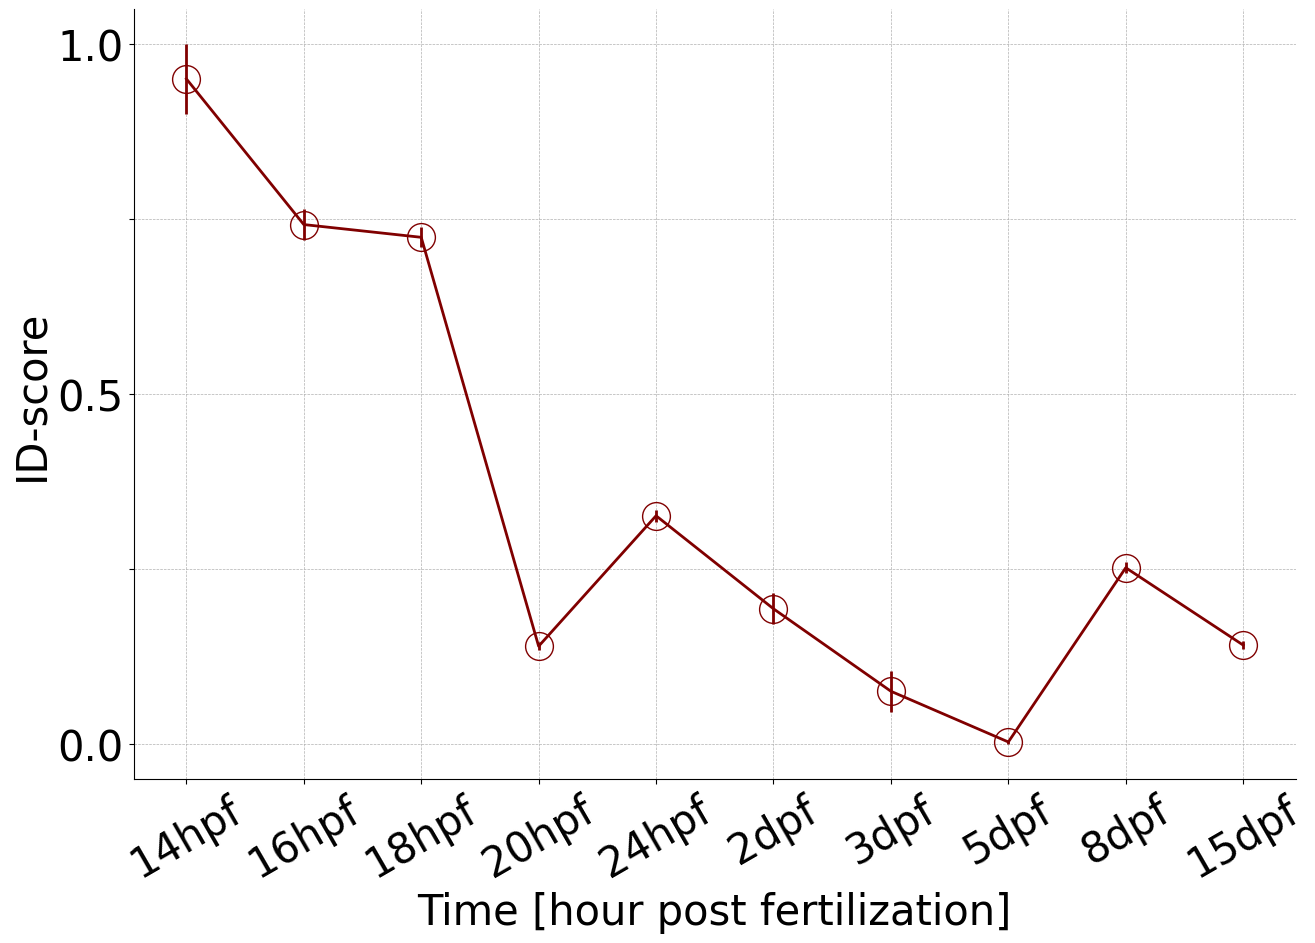

In [14]:
xlabel = f'{labeling} [hour post fertilization]'

plot_params = {"figsize": (15, 10),
                "label_size": 30,
                "markersize": 20,
                "linewidth": 2,
                "xlabel_rotation": 30}

Plot_figures.plot_temporal_trend(results_dict, dataset_name, xlabel, 
                        plot_params=plot_params)